In [1]:
import numpy as np
data = np.load("../hydrax/logs/controls_rollouts_full.npz", allow_pickle=True)


In [2]:
tq = data["tq"]
us = data["us"]
rollouts = data["rollouts"].tolist()  # list of dicts

In [3]:
# Extract and display all keys
print("Available keys in the data file:")
print("-" * 40)
for key in data.keys():
    value = data[key]
    if hasattr(value, 'shape'):
        print(f"'{key}': shape {value.shape}")
    else:
        print(f"'{key}': {value}")

print(f"\nTotal keys: {len(data.keys())}")

Available keys in the data file:
----------------------------------------
'tq': shape (321,)
'us': shape (321, 1)
'rollouts': shape (321,)

Total keys: 3


In [4]:
for i in range(3):
    print(f"Rollout {i} keys:", data['rollouts'][i].keys())
    print("Controls shape:", data['rollouts'][i]['controls'].shape)
    print()

Rollout 0 keys: dict_keys(['controls', 'trace_sites'])
Controls shape: (32, 50, 1)

Rollout 1 keys: dict_keys(['controls', 'trace_sites'])
Controls shape: (32, 50, 1)

Rollout 2 keys: dict_keys(['controls', 'trace_sites'])
Controls shape: (32, 50, 1)



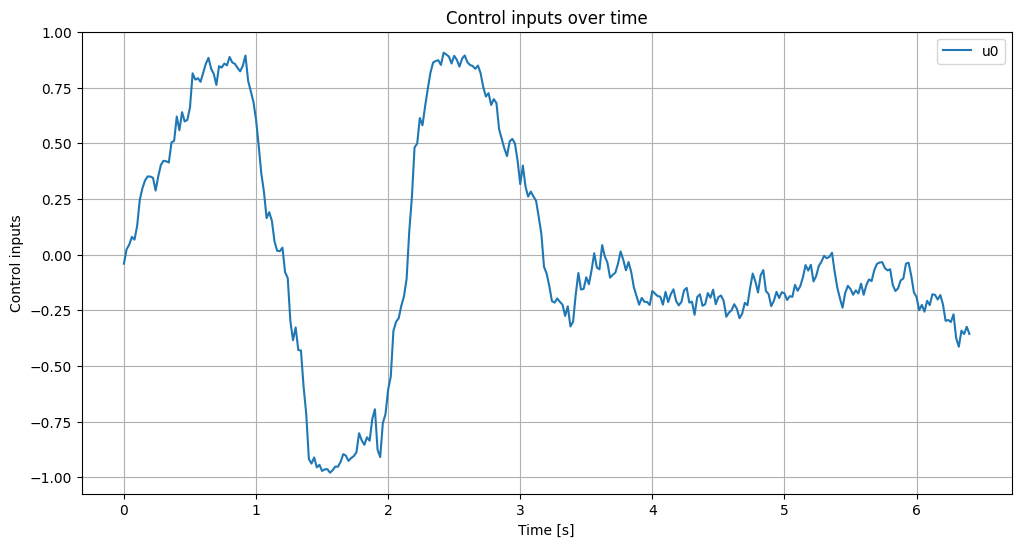

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Load the data (you already did this)
# data = np.load("../hydrax/logs/controls_full.npz")
# tq = data["tq"]
# us = data["us"]

# us shape: (num_timesteps, num_controls)
num_controls = us.shape[1]

plt.figure(figsize=(12, 6))
for i in range(num_controls):
    plt.plot(tq, us[:, i], label=f"u{i}")

plt.xlabel("Time [s]")
plt.ylabel("Control inputs")
plt.title("Control inputs over time")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_3733581/3501244054.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


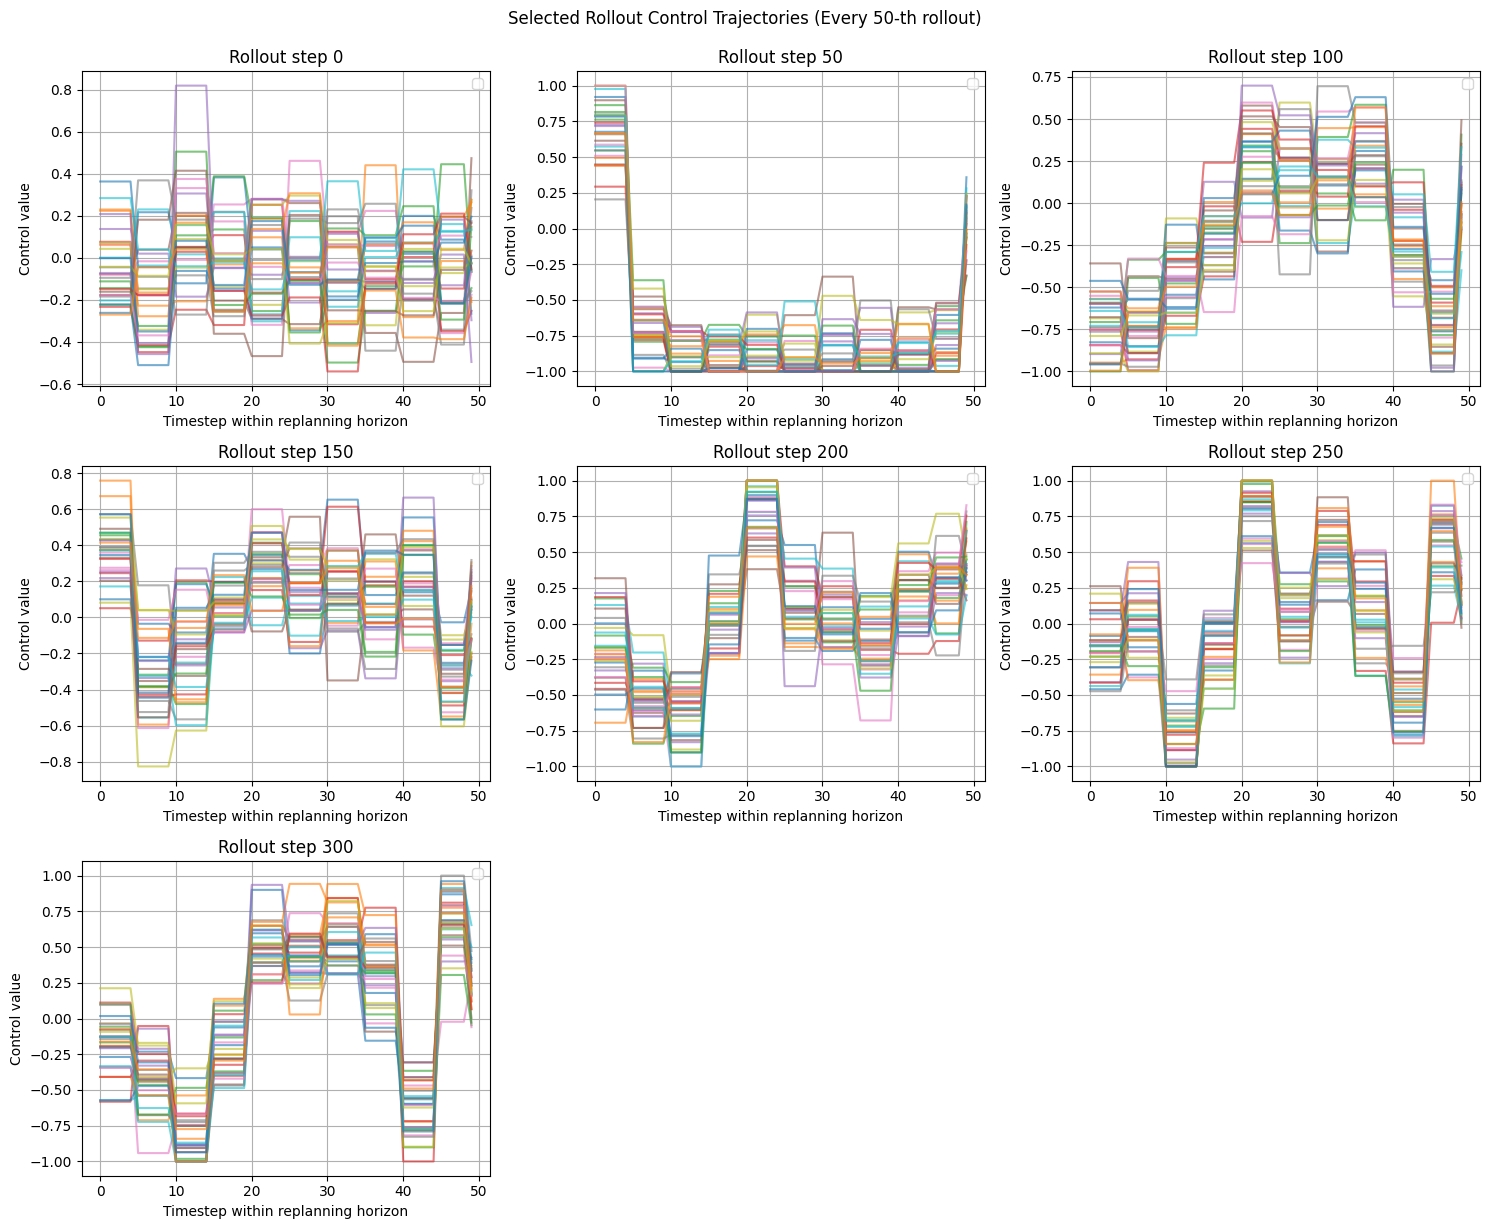

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)

# Decide number of plots per row
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    plt.subplot(num_rows, plots_per_row, plot_idx + 1)
    
    rollout_control = rollouts[rollout_idx]["controls"]  # (num_samples, ctrl_steps, nu)
    num_samples, ctrl_steps, nu = rollout_control.shape
    time = np.linspace(0, ctrl_steps-1, ctrl_steps)

    # Plot each control dimension as a separate line
    for i in range(nu):
        for s in range(num_samples):
            plt.plot(time, rollout_control[s, :, i], alpha=0.6)

    plt.xlabel("Timestep within replanning horizon")
    plt.ylabel("Control value")
    plt.title(f"Rollout step {rollout_idx}")
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.suptitle(f"Selected Rollout Control Trajectories (Every {step_interval}-th rollout)", y=1.02)
plt.show()


In [13]:
print(rollout_control.shape)
print(rollouts[0]["controls"].shape)

(32, 50, 1)
(32, 50, 1)


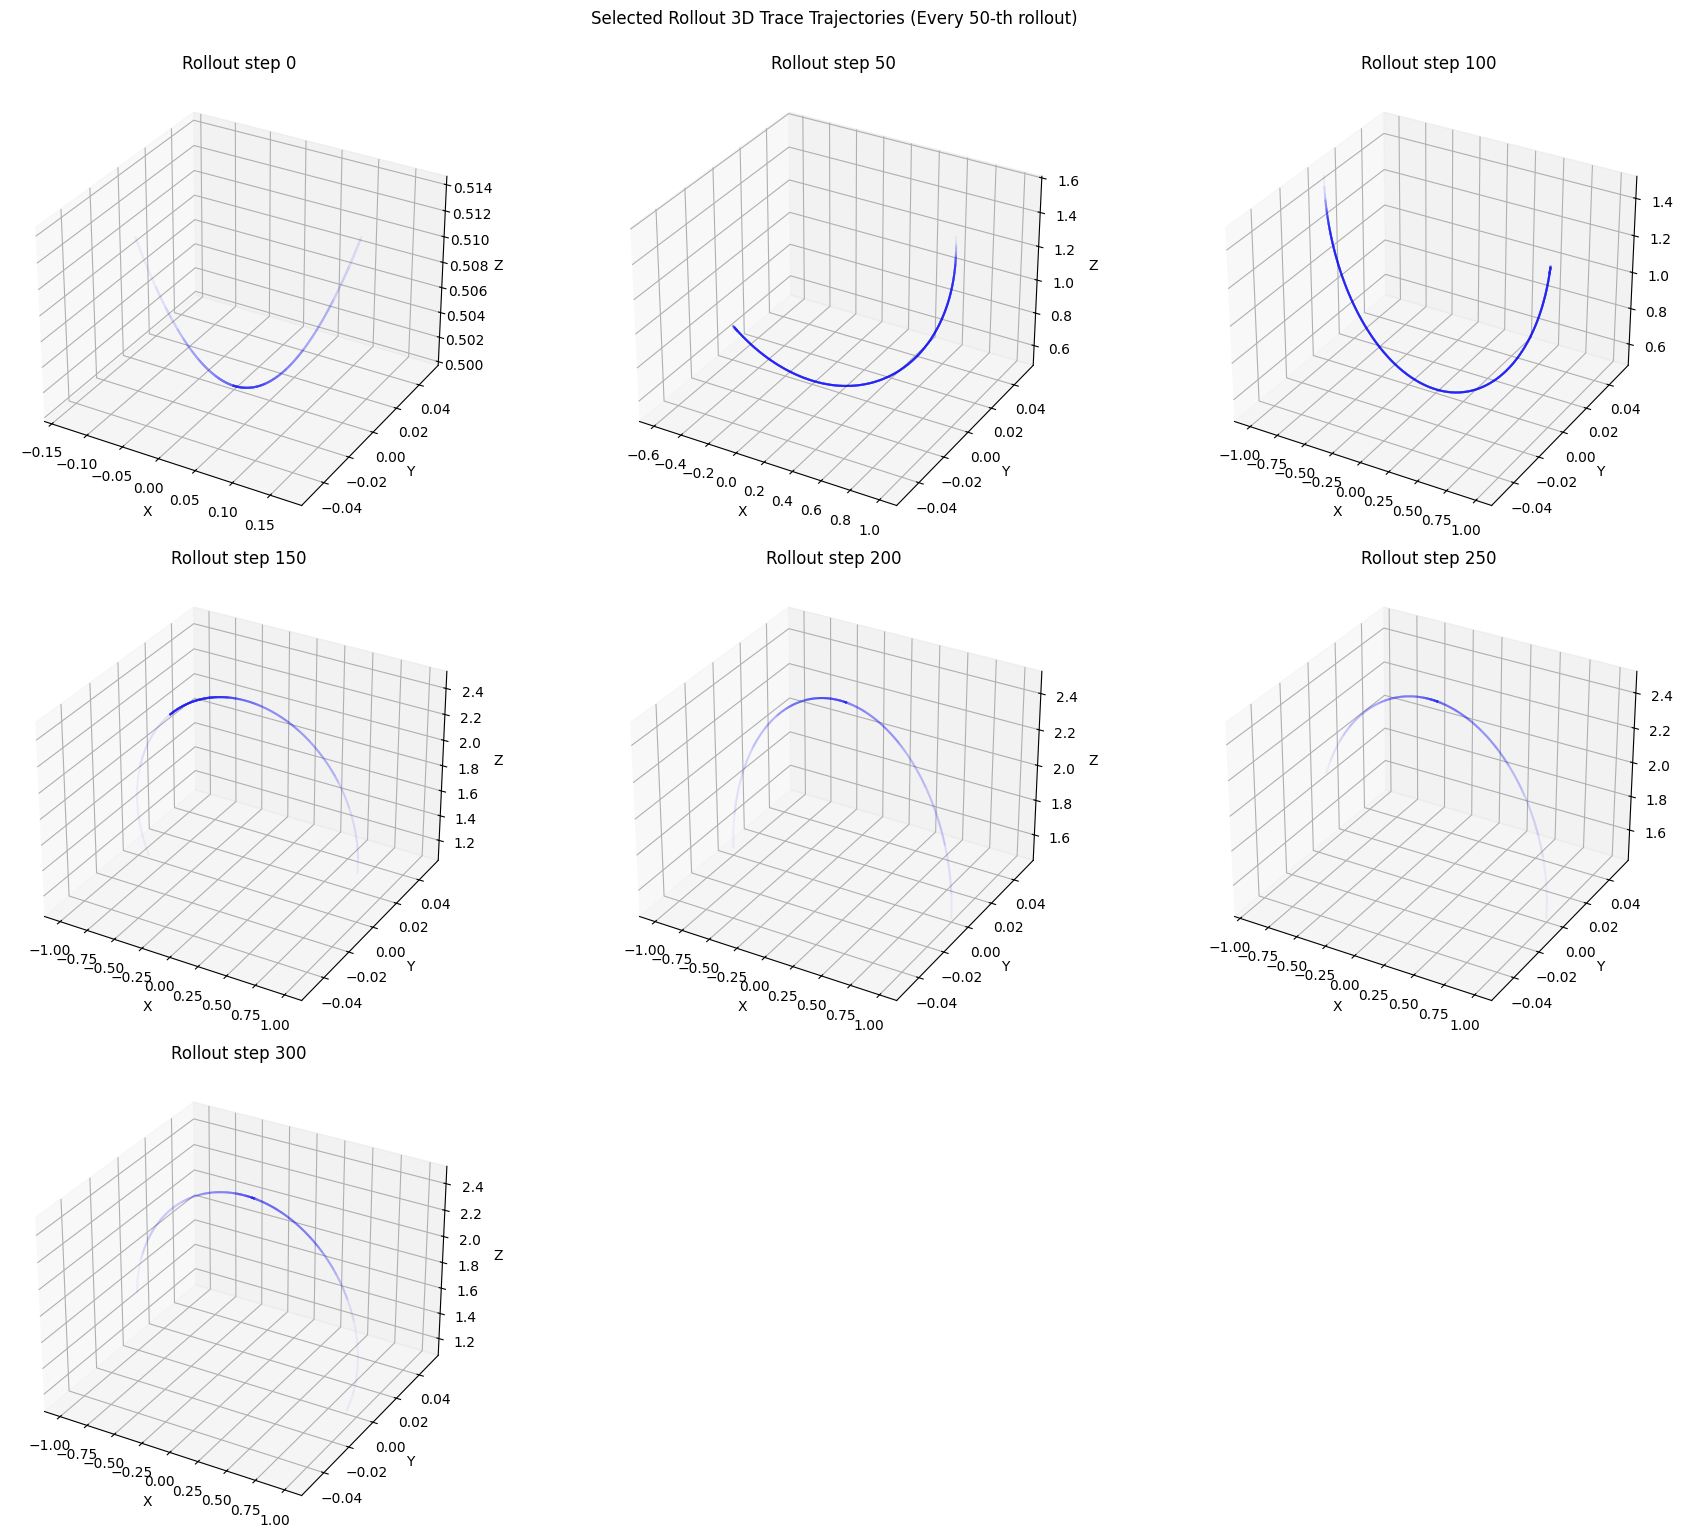

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

fig = plt.figure(figsize=(6 * plots_per_row, 5 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    ax = fig.add_subplot(num_rows, plots_per_row, plot_idx + 1, projection="3d")

    rollout_trace = rollouts[rollout_idx]["trace_sites"]  # shape (num_samples, steps, sites, 3)
    num_samples, steps, sites, _ = rollout_trace.shape

    # Only one site, so take index 0
    trace_data = rollout_trace[:, :, 0, :]  # (num_samples, steps, 3)

    # Plot all sample traces with high transparency
    for s in range(num_samples):
        ax.plot(
            trace_data[s, :, 0],  # x
            trace_data[s, :, 1],  # y
            trace_data[s, :, 2],  # z
            alpha=0.05,           # increased transparency
            color="blue"
        )

    ax.set_title(f"Rollout step {rollout_idx}")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.grid(True)

plt.tight_layout()
plt.suptitle(f"Selected Rollout 3D Trace Trajectories (Every {step_interval}-th rollout)", y=1.02)
plt.show()


(32, 51, 1, 3)


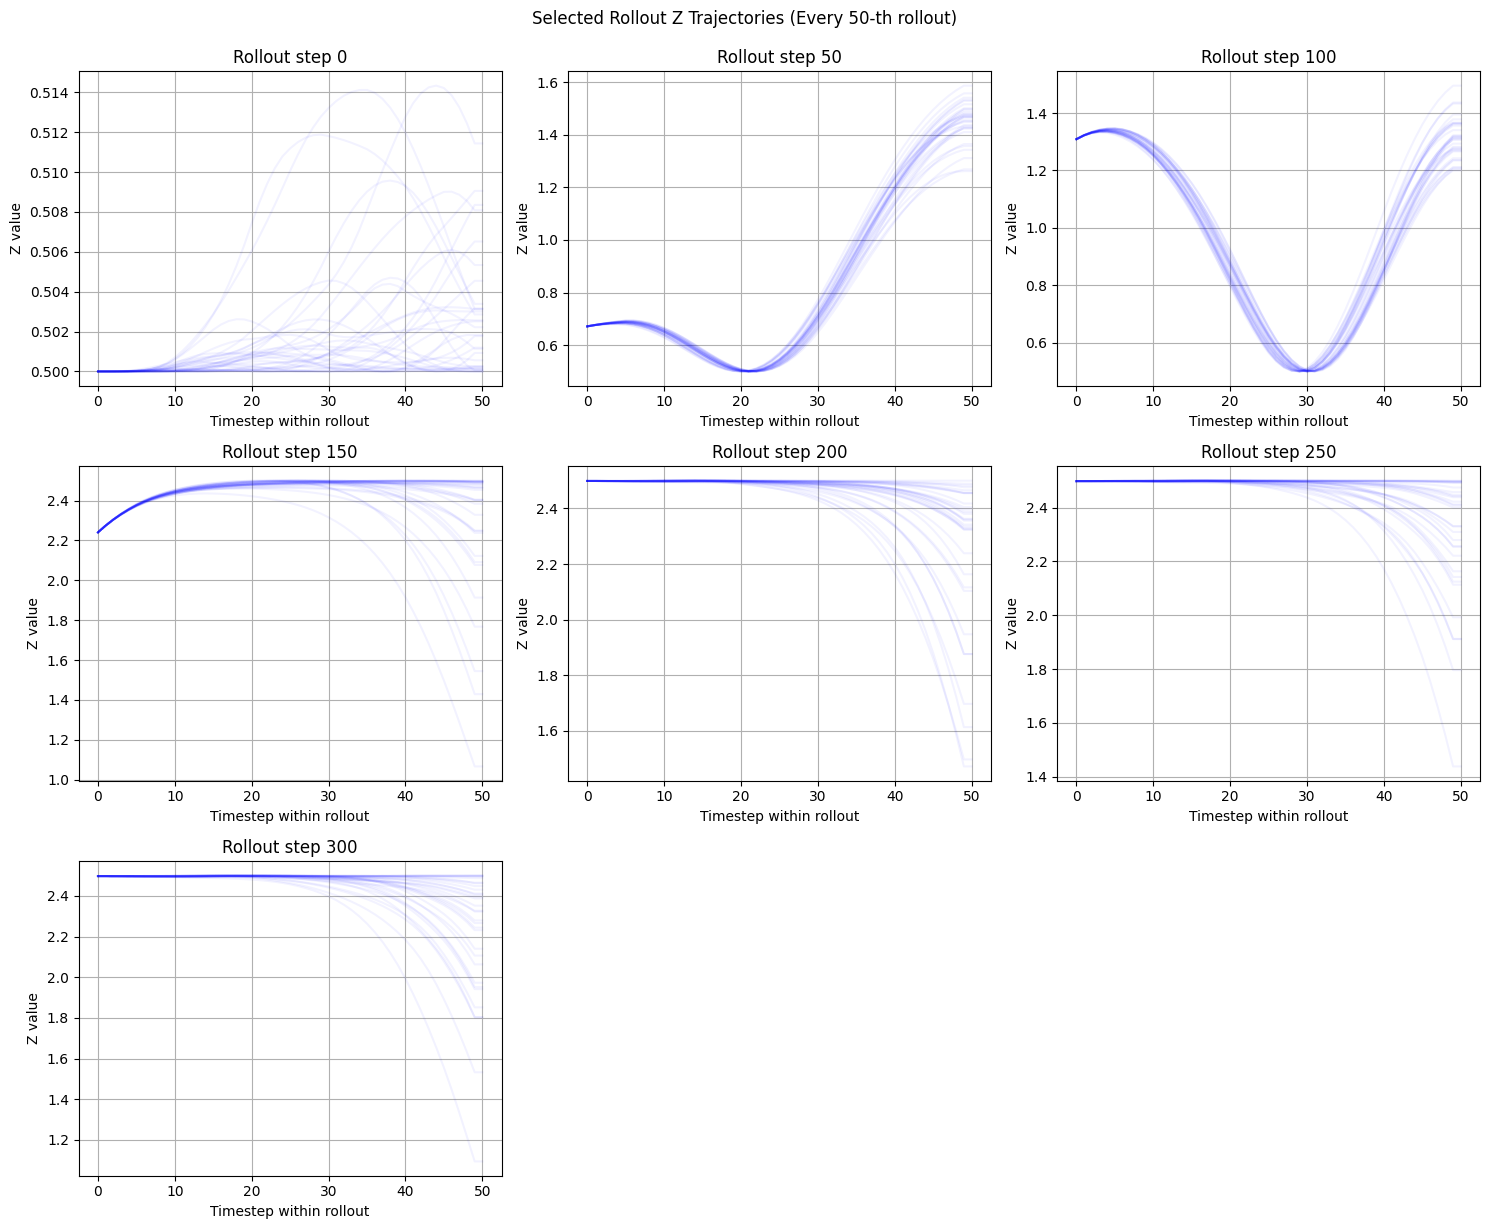

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

step_interval = 50
selected_indices = list(range(0, len(rollouts), step_interval))
num_plots = len(selected_indices)
plots_per_row = 3
num_rows = math.ceil(num_plots / plots_per_row)

plt.figure(figsize=(5 * plots_per_row, 4 * num_rows))

for plot_idx, rollout_idx in enumerate(selected_indices):
    plt.subplot(num_rows, plots_per_row, plot_idx + 1)
    
    rollout_trace = rollouts[rollout_idx]["trace_sites"]  # (num_samples, steps, sites, 3)
    num_samples, steps, sites, _ = rollout_trace.shape

    # Only one site, take the Z coordinate (index 2)
    z_traces = rollout_trace[:, :, 0, 2]  # shape (num_samples, steps)
    time = np.linspace(0, steps - 1, steps)

    # Plot all Z traces with high transparency
    for s in range(num_samples):
        plt.plot(time, z_traces[s, :], alpha=0.05, color="blue")

    plt.xlabel("Timestep within rollout")
    plt.ylabel("Z value")
    plt.title(f"Rollout step {rollout_idx}")
    plt.grid(True)

plt.tight_layout()
plt.suptitle(f"Selected Rollout Z Trajectories (Every {step_interval}-th rollout)", y=1.02)
plt.show()
